In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec

In [2]:
def initializepotential(R):
    grid = np.zeros((2*R + 1, 2*R+ 1))
    #initialize square potential
    a = int(4/5 * R)
    b = int(6/5 * R)
    grid[a,:] = 1
    grid[b,:] = -1
    firstgrid = copy.deepcopy(grid)
    
    mask = grid.astype(bool)
    mask[0,:] = True
    mask[2*R,:] = True

    return grid, mask

In [3]:
def neighbors(arr, x, y, n_row=3, n_col=3):
    arr=np.roll(np.roll(arr,shift=-x+int(n_row/2),axis=0),shift=-y+int(n_col/2),axis=1)
    return arr[:n_row,:n_col]

In [4]:
def relaxgrid(grid, mask):
    (i,j) = np.where(~mask)
    maxchange = np.inf
    N = 0
    while maxchange > 0.01:
        N += 1
        beforegrid = grid.copy()
        left = np.roll(grid, shift=1, axis=0)
        right = np.roll(grid, shift=-1, axis=0)
        up = np.roll(grid, shift=1, axis=1)
        down = np.roll(grid, shift=-1, axis=1)

        newgrid = (left + right + up + down) / 4
        grid[~mask] = newgrid[~mask]
        np.seterr(divide = 'ignore')
        np.seterr(divide='ignore', invalid='ignore')
        fracchange = abs(beforegrid - grid) / beforegrid
        maxchange = np.nanmax(fracchange)
    return grid, N

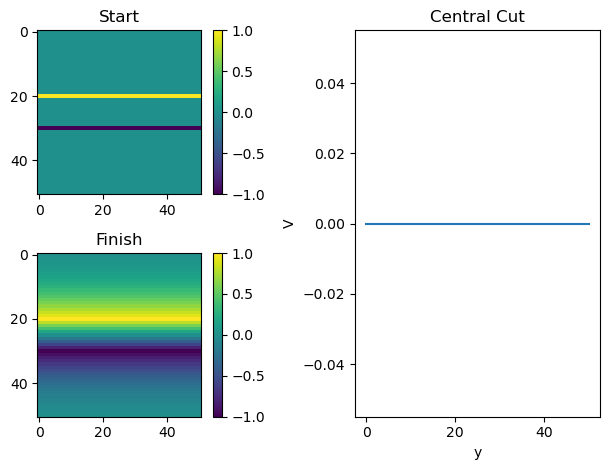

In [5]:
startgrid, mask = initializepotential(25)
grid = copy.deepcopy(startgrid)
endgrid, N25 = relaxgrid(grid, mask)

gs = gridspec.GridSpec(2, 2)

pl.figure()
ax = pl.subplot(gs[0, 0])
pl.imshow(startgrid)
pl.colorbar()
pl.title("Start")

ax = pl.subplot(gs[1, 0])
pl.imshow(endgrid)
pl.colorbar()
pl.title("Finish")

ax = pl.subplot(gs[:, 1])
pl.plot(range(51),grid[25])
pl.title("Central Cut")
pl.xlabel('y')
pl.ylabel('V')

plt.tight_layout()

The potential outside the plates has not converged to 0 because the smaller pixel count allows for convergence too early. When I increased the pixel count, the program was able to iterate more times and bring the convergence outside the plates to 0 as expected.